In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay


ModuleNotFoundError: No module named 'seaborn'

In [40]:
file_path = 'dataset_31_credit-g.arff'
data = arff.loadarff(file_path)
df = pd.DataFrame(data[0])
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


C:\Users\User\AppData\Local\Temp\ipykernel_119520\4231668106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='viridis')


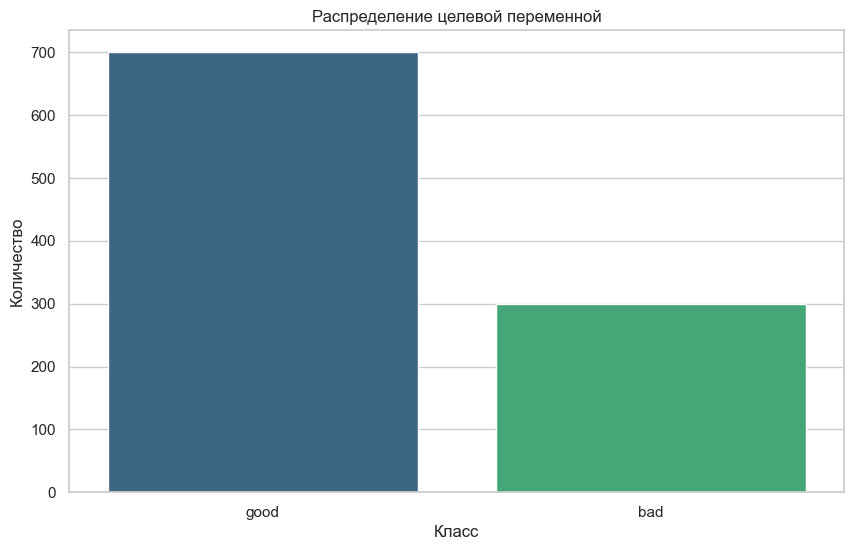

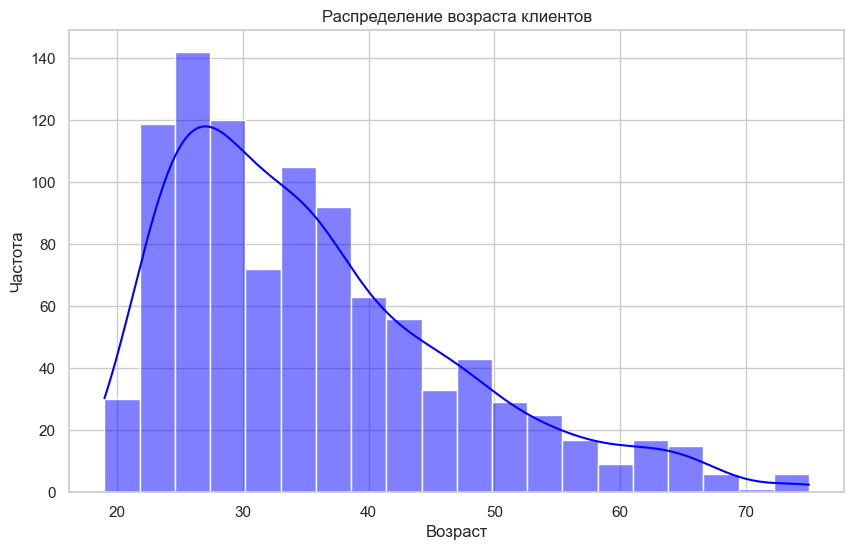

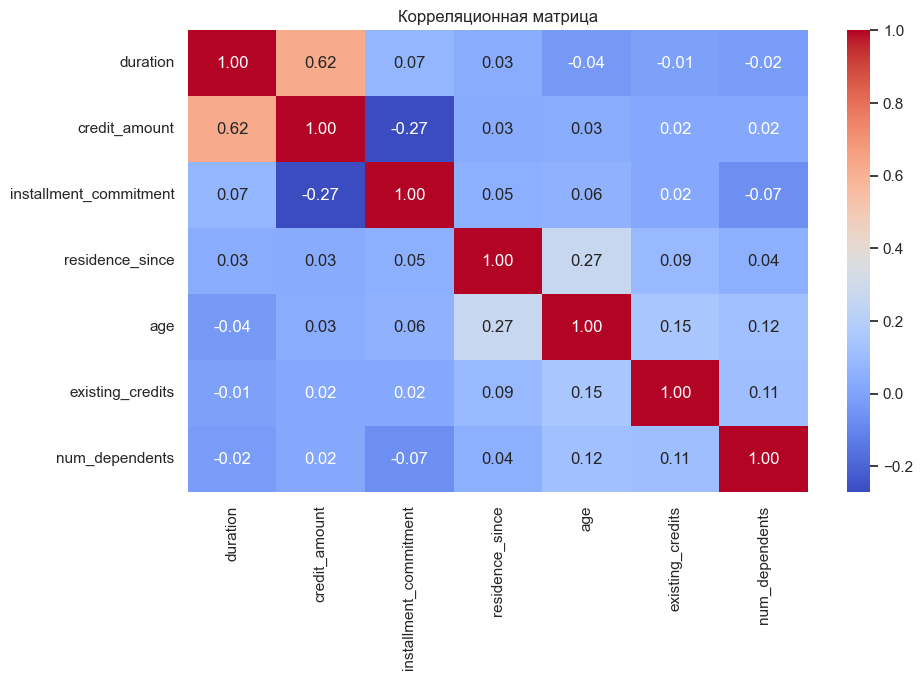

In [41]:
# Общее распределение классов
sns.countplot(data=df, x='class', palette='viridis')
plt.title("Распределение целевой переменной")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

# Распределение возраста
sns.histplot(df['age'], bins=20, kde=True, color="blue")
plt.title("Распределение возраста клиентов")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

# Корреляционная матрица
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


In [42]:
# Обработка категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Масштабирование числовых признаков
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Разделение на признаки и целевую переменную
X = df.drop('class', axis=1)
y = df['class']


C:\Users\User\AppData\Local\Temp\ipykernel_119520\2527708288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis', ax=ax[0])
C:\Users\User\AppData\Local\Temp\ipykernel_119520\2527708288.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis', ax=ax[1])


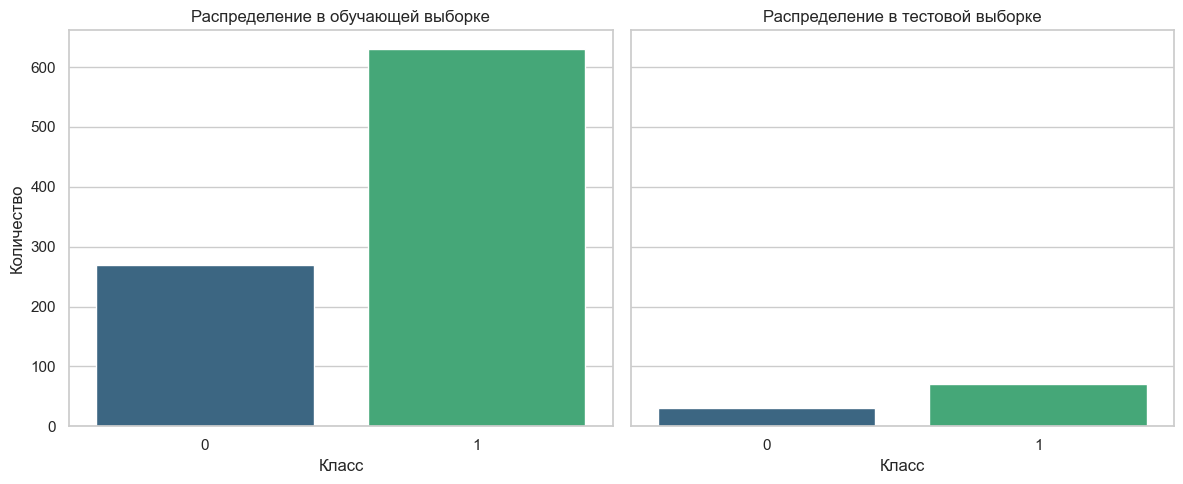

In [43]:
# Разделение данных на обучающую (90%) и тестовую (10%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# График распределения целевой переменной после разделения
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x=y_train, palette='viridis', ax=ax[0])
ax[0].set_title("Распределение в обучающей выборке")
ax[0].set_xlabel("Класс")
ax[0].set_ylabel("Количество")

sns.countplot(x=y_test, palette='viridis', ax=ax[1])
ax[1].set_title("Распределение в тестовой выборке")
ax[1].set_xlabel("Класс")

plt.tight_layout()
plt.show()


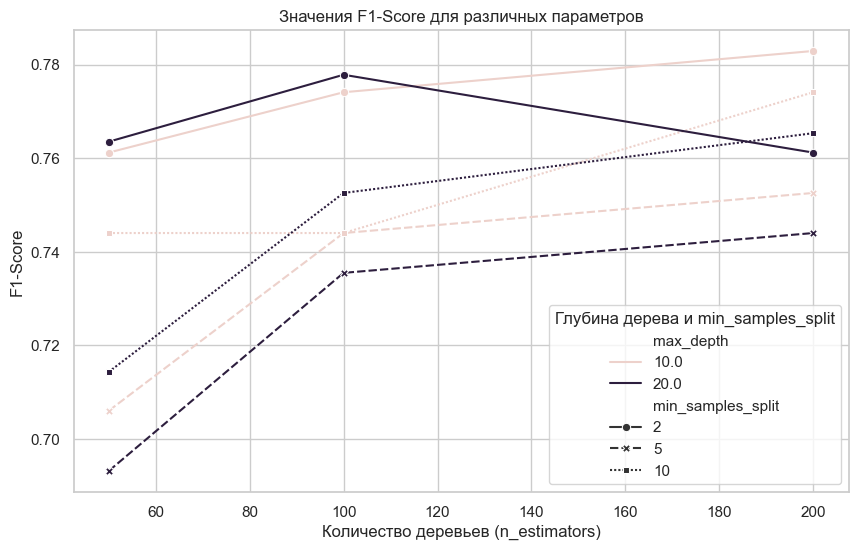

In [44]:
# Словарь параметров для исследования
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

best_model = None
best_f1 = 0
best_params = {}
f1_scores = []

# Исследование различных комбинаций параметров
for n in params['n_estimators']:
    for depth in params['max_depth']:
        for split in params['min_samples_split']:
            model = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            f1_scores.append((n, depth, split, f1))
            if f1 > best_f1:
                best_f1 = f1
                best_model = model
                best_params = {'n_estimators': n, 'max_depth': depth, 'min_samples_split': split}

# Визуализация F1-Score для каждой комбинации
f1_df = pd.DataFrame(f1_scores, columns=['n_estimators', 'max_depth', 'min_samples_split', 'f1_score'])
sns.lineplot(data=f1_df, x='n_estimators', y='f1_score', hue='max_depth', style='min_samples_split', markers=True)
plt.title("Значения F1-Score для различных параметров")
plt.xlabel("Количество деревьев (n_estimators)")
plt.ylabel("F1-Score")
plt.legend(title="Глубина дерева и min_samples_split")
plt.show()


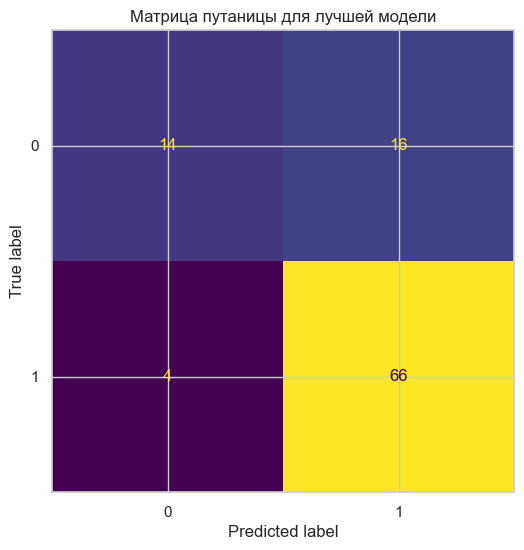

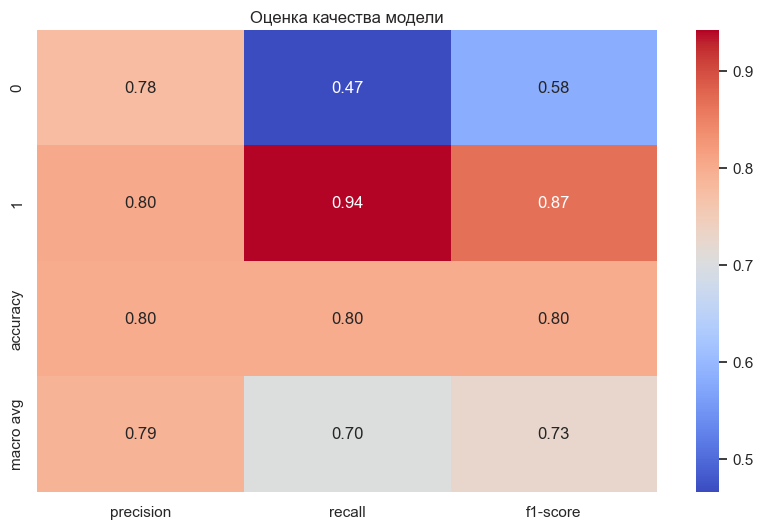

In [45]:
# Матрица путаницы
y_pred = best_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis', colorbar=False)
plt.title("Матрица путаницы для лучшей модели")
plt.show()

# Метрики качества
metrics = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(metrics).transpose()
sns.heatmap(metrics_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Оценка качества модели")
plt.show()


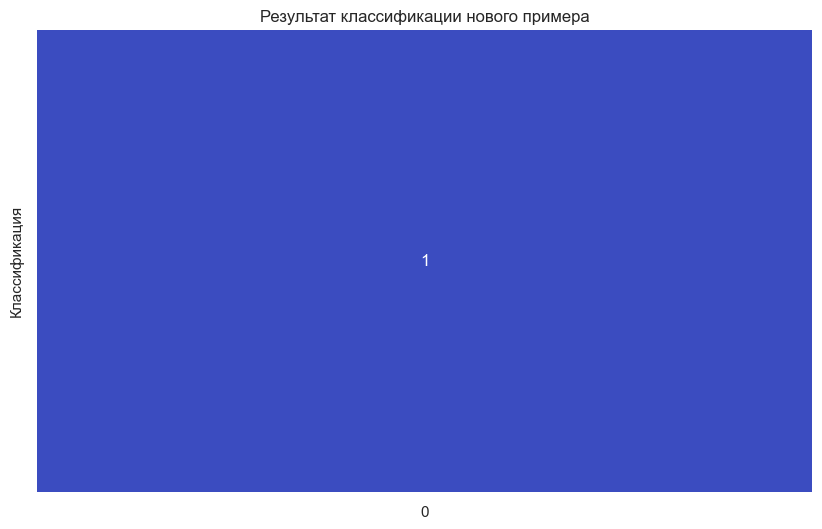

In [46]:
# Пример новой классификации (можно заменить на реальные данные)
new_data = X_test.iloc[0:1]  # Используем тестовую выборку как пример
classification_result = best_model.predict(new_data)

# Отображение результата
sns.heatmap(pd.DataFrame(classification_result, columns=["Классификация"]).T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Результат классификации нового примера")
plt.show()
